In [8]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from typing_extensions import Self
from scipy  import signal

class graf_aud:
    def __init__(self, Carg_audio, y, sr):
        #self.Cargar= Cargar
        self.Carg_audio = Carg_audio
        self.y = y
        self.sr = sr
        
    def leer_audio(self):
        self.y, self.sr = librosa.load(self.Carg_audio)
        fig, ax = plt.subplots(nrows=1, sharex=True)
        plt.plot(self.y)
    
    def plot_psd(self):
        freqs, psd = signal.welch(self.y)
        plt.figure(figsize=(10, 5))
        plt.semilogx(freqs, psd)
        plt.title('PSD: power spectral density')
        plt.xlabel('Frequency')
        plt.ylabel('Power')
        plt.tight_layout()
        
    def espectograma(self):
        freqs, times, spectrogram = signal.spectrogram(self.y)

        D = np.abs(librosa.stft(self.y))**2
        S = librosa.feature.melspectrogram(S=D, sr = self.sr)
        S = librosa.feature.melspectrogram(y=self.y, sr=self.sr, n_mels=128,fmax=8000)
                                            

        fig, ax = plt.subplots()
        S_dB = librosa.power_to_db(S, ref=np.max)
        img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=self.sr,fmax=8000, ax=ax)
                               
                                
        fig.colorbar(img, ax=ax, format='%+2.0f dB')
        ax.set(title='Mel-frequency spectrogram')


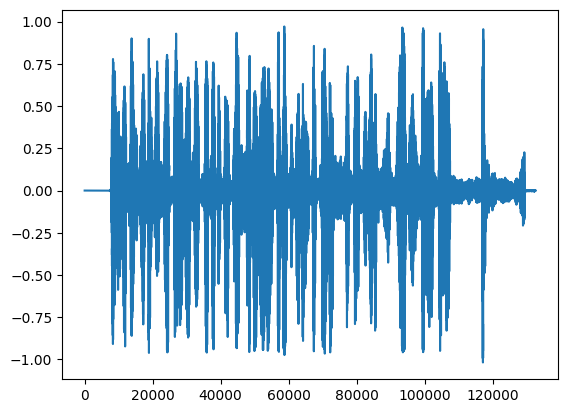

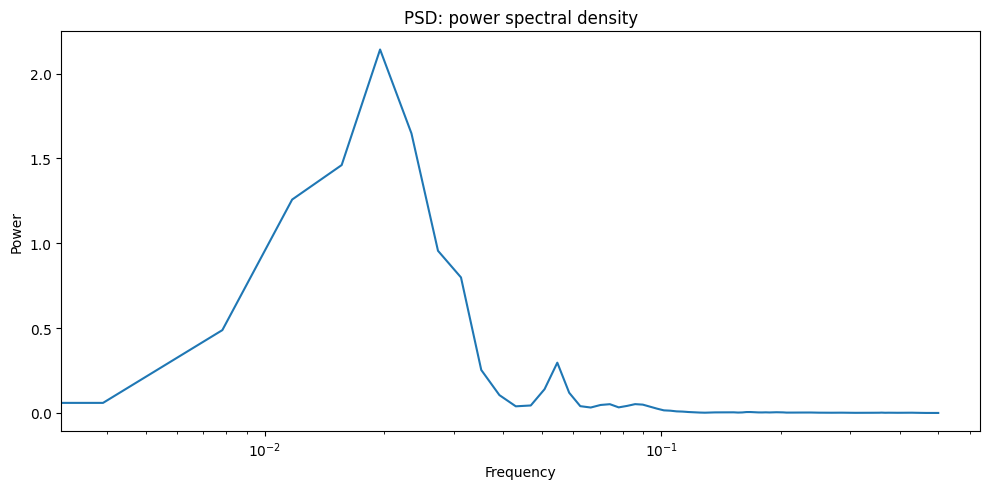

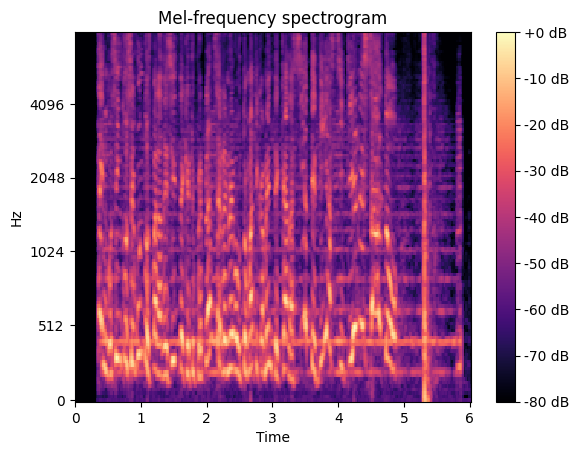

In [10]:
Audio = graf_aud("audio1.mp3",None,None)
Audio.leer_audio()
Audio.plot_psd()
Audio.espectograma()


In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
import librosa.display
import numpy as np

y, sr = librosa.load("audio1.mp3")
#y, sr = librosa.load(librosa.ex('choice'), duration=10)
fig, ax = plt.subplots(nrows=3, sharex=True)

librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()

librosa.display.waveshow(y, sr=sr, ax=ax[1])
ax[1].set(title='Envelope view, stereo')
ax[1].label_outer()


y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[2], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2], label='Percussive')
ax[2].set(title='Multiple waveforms')
ax[2].legend()

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
import librosa.display
import numpy as np

y, sr = librosa.load("audio1.mp3")
freqs, times, spectrogram = signal.spectrogram(y)

D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                    fmax=8000)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')